In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# === 1. CARGAR DATOS ===
nodos = pd.read_csv("../../data/networks/nodos_IPBLN.csv")
enlaces = pd.read_csv("../../data/networks/coautorias_IPBLN.csv")

# === 2. CONSTRUIR GRAFO ===
G = nx.Graph()

# Añadir nodos (opcional si edges ya los crea)
for _, row in nodos.iterrows():
    G.add_node(row["author_id"], label=row["Label"])  # puedes añadir más atributos si quieres

# Añadir aristas ponderadas
for _, row in enlaces.iterrows():
    G.add_edge(row["Source"], row["Target"], weight=row["Weight"])

# Componente gigante
Gcc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(Gcc).copy()

num_nodes = G_sub.number_of_nodes()
print("G has {} nodes".format(num_nodes))

G has 635 nodes


Paso 1: Asignar etiquetas a nodos semilla

In [2]:
# Crear diccionario de nombres a departamentos
nombre_departamentos = {
    "Biología molecular": list(set([
        "Berzal Herranz, Alfredo", 
        "Daza Martín, Manuel", 
        "Gómez Castilla, Jordi",
        "López Giménez, Juan Francisco", 
        "López López, Manuel Carlos",
        "Navarro Carretero, Miguel Ángel", 
        "Sánchez Luque, Francisco José",
        "Suñé Negre, Carles María", 
        "Thomas Carazo, María del Carmen",
        "Castilla Gómez de Agüero, Verónica",
        "Egui Machado, Adriana",
        "Jiménez Colón, Celia",
        "Macías Huete, Francisco",
        "Palacios Cortés, Génesis",
        "Ramos Lorente, Sara Esther",
        "Rojas Barros, Domingo Isaac",
        "Romero López, Cristina",
        "López-Barajas de la Puerta, Almudena",
        "Morcillo López, Andrea",
        "Ruiz Rodríguez, Candela",
        "Bueno Arribas, Pilar",
        "Duarte Ruiz, María",
        "Khribech , Nada",
        "Martín Villar, Mar",
        "Martínez Martínez, Noelia",
        "Medina Rodríguez, Lidia",
        "Moreno Castillo, Adela",
        "Moreno Castro, Cristina",
        "Reeve , Ivo Arthur Frederick",
    ])),
    "Biología celular e inmunología": list(set([
        "Acosta Herrera, Marialbert", 
        "Alcina Madueño, Antonio", 
        "Delgado Mora, Mario",
        "González Rey, Elena", 
        "Hernández López de Munain, María Cristina",
        "Macías Sánchez, Elena", 
        "Márquez Ortiz, Ana María", 
        "Martín Ibáñez, Javier",
        "Matesanz del Barrio, Fuencisla", 
        "Oliver Pozo, Francisco Javier",
        "Ortíz Fernández, Lourdes", 
        "Sancho López, Jaime", 
        "Zubiaur Marcos, Mercedes", 
        "Campos Salinas, Jenny Karina",
        "Cerván Martín, Miriam",
        "Chernyshova , Tetiana",
        "Fedetz Ladeyshchykova, María Ivanovna",
        "González García, Pilar",
        "Kerick , Martin",
        "Khantham , Chiranan",
        "Rodríguez Caparrós, Alonso",
        "Serrano Martínez, Ignacio",
        "Terrón Camero, Laura Carmen",
        "Zamudio Martínez, Esteban",
        "Blázquez Caraballo, Ana Reyes",
        "Borrego Yaniz, Gonzalo",
        "Cabeza Fernández, Vanesa",
        "Cuenca Martagón, Alejandro",
        "García Frutos, Marina",
        "García García, Daniel Jesús",
        "Herrera Campos, Ana Belén",
        "Martínez Gutiérrez, Laura",
        "Pulpillo Berrocal, Marco Apolo",
        "Rangel Peláez, Carlos",
        "Rodríguez Martín, María Inmaculada",
        "Rosa Báez, Carlos de la",
        "Vargas Rodríguez, Pablo Francisco",
        "Caro Moreno, Marta",
        "Forte Lago, Irene",
        "García Díaz, Ángel",
        "Lao Peregrín, Ana María",
        "López Jiménez, Laura María",
        "Robledo Pérez, María Gemma",
        "Vargas Roldán, Sofía",
        "Vidal Cobo, Isabel Beatriz",
        "Arias Torres, Estefanía",
        "Armesto Longueira, Edurne",
        "Buzón Martínez, José Manuel",
        "El Khattabi, Mariam",
        "El Khattabi , Mariam",
        "Martínez López, Javier",
        "Moreno Mesas, María",
        "Rodríguez Leal, Alba",
        "Romero Salcedo, Diego"
    ])),
    "Bioquímica y farmacología molecular": list(set([
        "Castanys Cuello, Santiago", 
        "Estévez García, Antonio Manuel", 
        "Gómez Díaz, Elena",
        "González Pacanowska, Dolores Petra", 
        "Morales Sánchez, Juan Carlos",
        "Pérez-Victoria Moreno de Barreda, José María", 
        "Ruiz Pérez, Luis Miguel",
        "Sánchez Navarro, Macarena", 
        "Vidal Romero, Antonio Esteban",
        "Castillo Acosta, Victor Manuel",
        "Cordón Obras, Carlos",
        "Díaz González, Rosario",
        "Fernández López, Maria Belen",
        "García Hernández, Raquel",
        "Gómez Liñán, Claudia",
        "Juez Castillo, Graciela",
        "López Farfán, Diana Carolina",
        "Martínez Arribas, Blanca",
        "Pérez Moreno, Guiomar",
        "Benítez Troncoso, José Alejandro",
        "Díaz Terenti, Bárbara",
        "García Arroyave, Sara",
        "García Pérez, Belén",
        "Hurtado López, Mercedes",
        "López García, Juan Alberto",
        "Parres Mercader, Marina",
        "Quesada Martínez, Paula",
        "Sáez Maldonado, María del Mar",
        "Serrano Durán, Rafael",
        "Bosch Navarrete, Cristina",
        "Constán Gutiérrez, Aurora",
        "Sanz Serrano, Verónica",
        "del Sagrado Quereda, María José",
        "Guerra Arias, Diego Alexander",
        "Pérez Soto, Manuel",
        "Plaza Garrido, Marina",
        "Sánchez-Reseco Mateos-Aparicio, Alberto",
        "Tamayo Escalona, Lucía",
        "Traore , Abdouramane",
    ]))
}

counter = 0
for value in nombre_departamentos.values():
    counter = counter + len(value)

print(f"Total de autores: {counter}")

Total de autores: 122


In [4]:
import json

# === Cargar JSON con datos de autores ===
with open("../../../data/data/IPBLN/json/gesbib_authors_ipbln_info.json", "r", encoding="utf-8") as f:
    datos_autores = json.load(f)

# === Crear mapping: nombre → etiqueta_departamento ===
nombre_a_etiqueta = {}
for depto, lista in nombre_departamentos.items():
    for nombre in lista:
        nombre_a_etiqueta[nombre.strip()] = depto

# === Construir id_a_label usando firmas del JSON ===
id_a_label = {}
for author_id_str, datos in datos_autores.items():
    firmas = [f for f in datos.get("firmas", [])]
    for nombre, etiqueta in nombre_a_etiqueta.items():
        if nombre in firmas:
            id_autor = datos.get("idAutor")
            id_a_label[id_autor] = etiqueta
            break  # si ya coincide con una firma, no busca más


print(f"Autores encontrados: {len(id_a_label)}")

Autores encontrados: 46


Paso 2: Generar embeddings con DeepWalk (usando Node2Vec)

In [6]:
from node2vec import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# === Custom Transformer: Node2Vec Embeddings ===

class Node2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, dimensions=64, walk_length=30, num_walks=100, p=1.0, q=1.0):
        self.dimensions = dimensions
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.p = p
        self.q = q
        self.embeddings_ = {}

    def fit(self, X, y=None):
        # X is a list of node_ids (str or int)
        node2vec = Node2Vec(
            G_sub,
            dimensions=self.dimensions,
            walk_length=self.walk_length,
            num_walks=self.num_walks,
            p=self.p,
            q=self.q,
            workers=2,
            weight_key='weight'
        )
        model = node2vec.fit(window=10, min_count=1)
        self.embeddings_ = {str(n): model.wv[str(n)] for n in G_sub.nodes() if str(n) in model.wv}
        return self

    def transform(self, X):
        return np.array([self.embeddings_.get(str(n), np.zeros(self.dimensions)) for n in X])


c:\Users\Pablo\OneDrive\Documentos\Estudios\DATCOM\Trabajo Fin de Máster\App\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Paso 3: Clasificación supervisada con los nodos semilla

In [7]:
# === Preparar etiquetas ===

X_nodes = []
y_labels = []

for node_id, label in id_a_label.items():
    if node_id in G_sub.nodes:
        X_nodes.append(node_id)
        y_labels.append(label)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)

X_train, X_test, y_train, y_test = train_test_split(
    X_nodes, y_encoded, test_size=0.15, stratify=y_encoded, random_state=42
)
print(f"X_train: {len(X_train)}, X_test: {len(X_test)}")

X_train: 39, X_test: 7


In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

# === Pipeline: Node2Vec + Clasificador ===

pipeline = Pipeline([
    ('n2v', Node2VecTransformer()),
    ('clf', LogisticRegression(max_iter=1000))
])

# === Definir parámetros a explorar ===

# Parámetros a explorar, incluyendo distintos clasificadores
param_grid = [
    # {
    #     'clf': [LogisticRegression(max_iter=1000)],
    #     'n2v__dimensions': [32, 64],
    #     'n2v__walk_length': [20, 40],
    #     'n2v__num_walks': [50],
    #     'n2v__p': [1],
    #     'n2v__q': [1]
    # },
    # {
    #     'clf': [RandomForestClassifier()],
    #     'n2v__dimensions': [32, 64],
    #     'n2v__walk_length': [40],
    #     'n2v__num_walks': [50],
    #     'n2v__p': [1],
    #     'n2v__q': [1]
    # },
    # {
    #     'clf': [GradientBoostingClassifier()],
    #     'n2v__dimensions': [32, 64],
    #     'n2v__walk_length': [20, 40],
    #     'n2v__num_walks': [50],
    #     'n2v__p': [1],
    #     'n2v__q': [1]
    # },
    {
        'clf': [MLPClassifier(max_iter=1000)],
        'n2v__dimensions': [32, 64],
        'n2v__walk_length': [20, 40],
        'n2v__num_walks': [50],
        'n2v__p': [1],
        'n2v__q': [1]
    }
]

# === Búsqueda de hiperparámetros ===

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring=make_scorer(f1_score, average='macro'),
    verbose=2,
    n_jobs=8,
    error_score='raise'  # Esto te dirá exactamente qué va mal
)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Computing transition probabilities: 100%|██████████| 635/635 [00:00<00:00, 1701.78it/s]


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('n2v', Node2VecTransformer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=8,
             param_grid=[{'clf': [MLPClassifier(max_iter=1000)],
                          'n2v__dimensions': [32, 64], 'n2v__num_walks': [50],
                          'n2v__p': [1], 'n2v__q': [1],
                          'n2v__walk_length': [20, 40]}],
             scoring=make_scorer(f1_score, response_method='predict', average=macro),
             verbose=2)

In [9]:
# === Resultados ===

print(f"Mejores parámetros: {grid.best_params_}")
print(f"Mejor F1 macro: {grid.best_score_:.4f}")

# Evaluar en test final
y_pred = grid.predict(X_test)
print("Classification report:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Mejores parámetros: {'clf': MLPClassifier(max_iter=1000), 'n2v__dimensions': 32, 'n2v__num_walks': 50, 'n2v__p': 1, 'n2v__q': 1, 'n2v__walk_length': 40}
Mejor F1 macro: 0.8577
Classification report:
                                     precision    recall  f1-score   support

     Biología celular e inmunología       1.00      1.00      1.00         3
                 Biología molecular       1.00      1.00      1.00         2
Bioquímica y farmacología molecular       1.00      1.00      1.00         2

                           accuracy                           1.00         7
                          macro avg       1.00      1.00      1.00         7
                       weighted avg       1.00      1.00      1.00         7



In [10]:
# === 1. PREDICCIONES PARA TODOS LOS NODOS POSIBLES ===

# Obtener embeddings del mejor modelo Node2Vec
best_n2v = grid.best_estimator_.named_steps["n2v"]
best_embeddings = best_n2v.embeddings_

# Obtener clasificador entrenado
best_clf = grid.best_estimator_.named_steps["clf"]

# Predecir etiquetas para nodos no etiquetados
predicciones = {}
for node_id in G_sub.nodes():
    if node_id not in id_a_label and str(node_id) in best_embeddings:
        emb = best_embeddings[str(node_id)]
        pred = best_clf.predict([emb])[0]
        predicciones[node_id] = encoder.inverse_transform([pred])[0]

# Añadir los nodos semilla (etiquetas reales)
for node_id, etiqueta in id_a_label.items():
    predicciones[node_id] = etiqueta

In [11]:
# === 2. GUARDAR RESULTADOS COMO CSV ===
df_resultados = pd.DataFrame([
    {"author_id": node_id, "departamento": etiqueta}
    for node_id, etiqueta in predicciones.items()
])

Modularidad inducida por etiquetas predichas: 0.4905


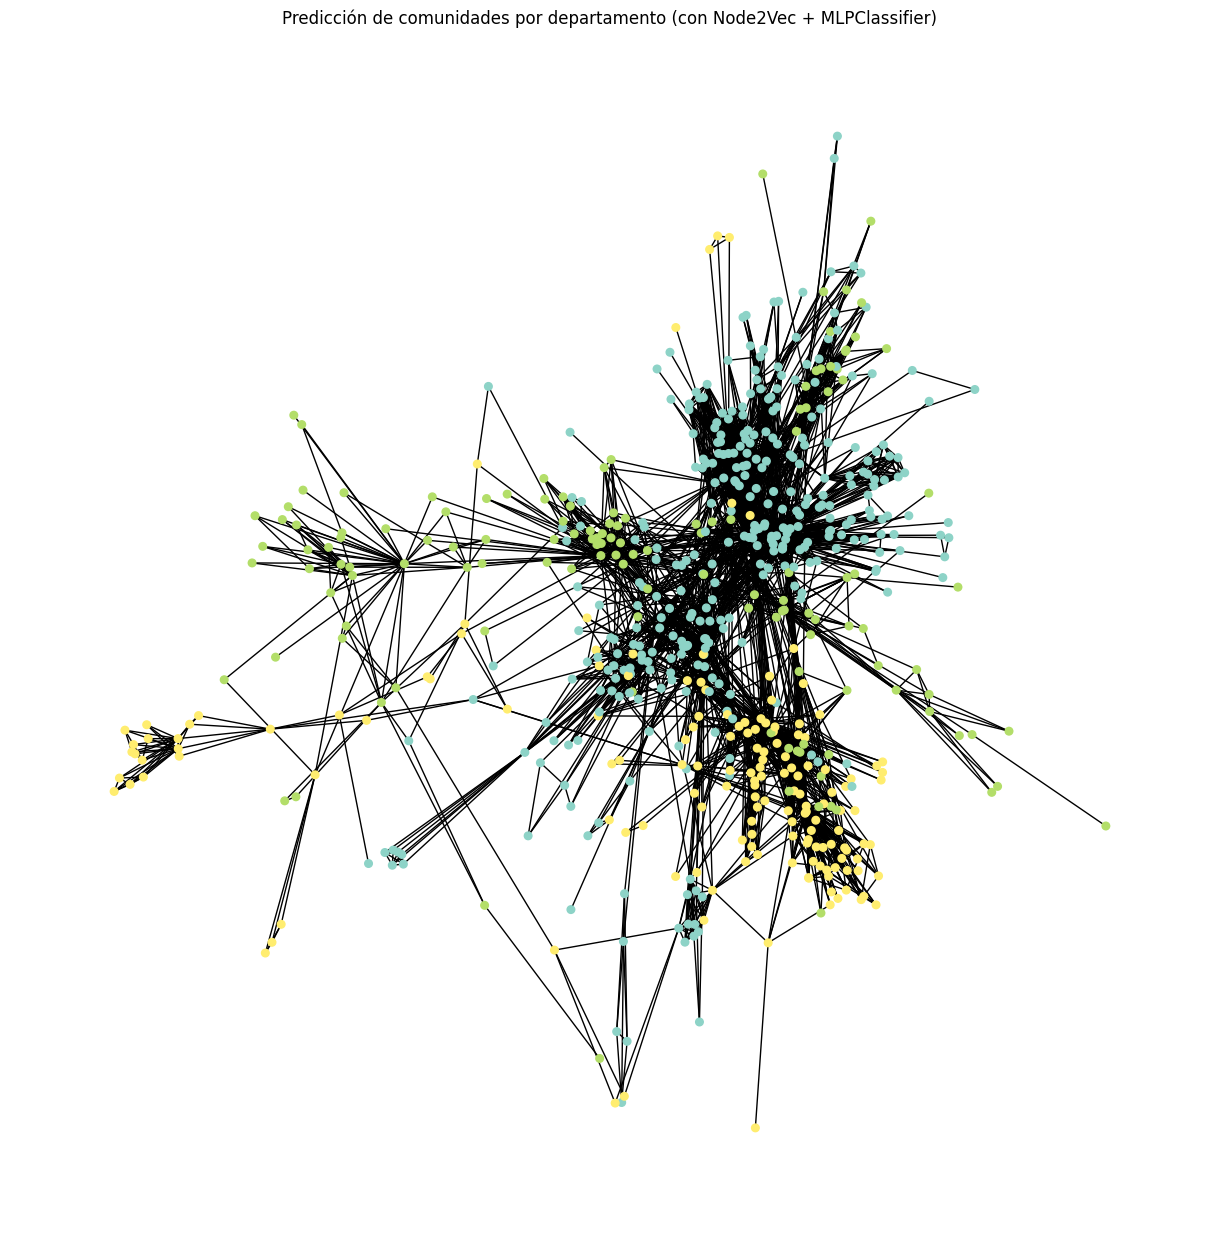

In [13]:
from networkx.algorithms.community.quality import modularity

# Agrupar por etiqueta
comunidades = {}
for nodo, etiqueta in predicciones.items():
    comunidades.setdefault(etiqueta, set()).add(nodo)

lista_comunidades = list(comunidades.values())
mod = modularity(G_sub, lista_comunidades, weight='weight')
print(f"Modularidad inducida por etiquetas predichas: {mod:.4f}")

# === 3. DIBUJAR GRAFO CON ETIQUETAS PREDICHAS ===
# Asignar un color a cada departamento
colors = {label: idx for idx, label in enumerate(sorted(set(predicciones.values())))}
node_colors = [colors[predicciones[n]] for n in G_sub.nodes if n in predicciones]

# Posicionamiento y dibujo
pos = nx.spring_layout(G_sub, seed=42)
plt.figure(figsize=(12, 12))
nx.draw(G_sub, pos, node_color=node_colors, node_size=30, with_labels=False, cmap=plt.cm.Set3)
plt.title("Predicción de comunidades por departamento (con Node2Vec + MLPClassifier)")
plt.show()

In [17]:
print(id_a_label)
print(predicciones)

{2105: 'Bioquímica y farmacología molecular', 21710: 'Biología molecular', 21711: 'Biología molecular', 21712: 'Biología molecular', 21718: 'Bioquímica y farmacología molecular', 21761: 'Biología celular e inmunología', 21804: 'Biología celular e inmunología', 21922: 'Biología celular e inmunología', 21923: 'Biología celular e inmunología', 21987: 'Biología molecular', 22375: 'Biología molecular', 128050: 'Biología celular e inmunología', 128074: 'Bioquímica y farmacología molecular', 128135: 'Bioquímica y farmacología molecular', 128146: 'Bioquímica y farmacología molecular', 128224: 'Bioquímica y farmacología molecular', 128400: 'Biología molecular', 128752: 'Biología molecular', 128754: 'Biología celular e inmunología', 128821: 'Biología celular e inmunología', 128836: 'Bioquímica y farmacología molecular', 128862: 'Biología molecular', 129130: 'Biología celular e inmunología', 129142: 'Biología celular e inmunología', 129171: 'Bioquímica y farmacología molecular', 135092: 'Biología

In [19]:
# Crear corpus: una "frase" por autor con las materias
autores_texto = {}
for author_id, datos in datos_autores.items():
    materias_jcr = datos.get("materiasJcr", {})
    materias_cs = datos.get("materiasCs", {})
    palabras_clave = datos.get("palabrasClave", [])
    materias = list(materias_jcr) + list(materias_cs) + list(palabras_clave)
    texto_materias = " ".join(m.lower().strip().replace(",", "") for m in materias)
    autores_texto[author_id] = texto_materias

# Crear DataFrame
df_materias = pd.DataFrame([
    {"author_id": aid, "materias_text": text}
    for aid, text in autores_texto.items()
])

# Unir con las etiquetas conocidas
df_materias["author_id"] = df_materias["author_id"].astype(int)
df_materias["label"] = df_materias["author_id"].map(predicciones)

print(df_materias.head())
print(df_materias.shape)

   author_id                                      materias_text  \
0       2078  chemistry organic chemistry medicinal chemistr...   
1       2105  neurosciences materials science biomaterials c...   
2       4243  neurosciences microbiology entomology chemistr...   
3       4244  pediatrics neurosciences microbiology entomolo...   
4      13157  chemistry inorganic & nuclear materials scienc...   

                                 label  
0  Bioquímica y farmacología molecular  
1  Bioquímica y farmacología molecular  
2       Biología celular e inmunología  
3       Biología celular e inmunología  
4  Bioquímica y farmacología molecular  
(849, 3)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizar materias
vectorizer = TfidfVectorizer()
X_materias = vectorizer.fit_transform(df_materias["materias_text"])

# Guardar etiquetas solo donde existan
mask_etiquetados = df_materias["label"].notnull()
X_train = X_materias[mask_etiquetados]
y_train = df_materias.loc[mask_etiquetados, "label"]

print("Autores con materias y etiqueta:", mask_etiquetados.sum())
print("Total en df_materias:", len(df_materias))

Autores con materias y etiqueta: 635
Total en df_materias: 849


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Codificar etiquetas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Train/test split para evaluar
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train_encoded, test_size=0.2, stratify=y_train_encoded, random_state=42)
print("Tamaño de train:", X_tr.shape)
print("Tamaño de test:", X_te.shape)

# Entrenar clasificador
# clf_text = LogisticRegression(max_iter=1000)
# clf_text.fit(X_tr, y_tr)

# Probar SVC
clf_text = LinearSVC()
clf_text.fit(X_tr, y_tr)

# Evaluar
y_pred = clf_text.predict(X_te)
print(classification_report(y_te, y_pred, target_names=encoder.classes_))


Tamaño de train: (508, 7595)
Tamaño de test: (127, 7595)
                                     precision    recall  f1-score   support

     Biología celular e inmunología       0.87      0.87      0.87        67
                 Biología molecular       0.86      0.89      0.88        28
Bioquímica y farmacología molecular       0.71      0.69      0.70        32

                           accuracy                           0.83       127
                          macro avg       0.81      0.82      0.81       127
                       weighted avg       0.83      0.83      0.83       127



Paso 4: Clasificar autores no conectados al grafo

In [22]:
# Máscara para nodos sin etiqueta (posibles autores no conectados)
mask_sin_etiqueta = df_materias["label"].isnull()
X_unknown = X_materias[mask_sin_etiqueta]
ids_unknown = df_materias.loc[mask_sin_etiqueta, "author_id"].values

# Predecir
y_unknown = clf_text.predict(X_unknown)
labels_unknown = encoder.inverse_transform(y_unknown)

# Guardar predicciones
df_predicciones_texto = pd.DataFrame({
    "author_id": ids_unknown,
    "departamento": labels_unknown
})

In [23]:
# Unir ambos
df_total = pd.concat([df_resultados, df_predicciones_texto], ignore_index=True)
df_total = df_total.merge(nodos, on="author_id", how="left")

# nombres_apoyo = list(set([
#     "Sánchez González, Clara E.",
#     "Orrego Zapata, Lina María",
#     "Andrés León, Eduardo",
#     "Terrón Camero, Laura Carmen",
#     "Pérez Sánchez Cañete, María M.",
#     "Lario Simón, Antonio",
#     "Sánchez Navarro, Macarena",
#     "Rodríguez Caparrós, Alonso",
#     "Falo, Clara P.",
#     "Canet-Antequera, Luz Maria",
#     "Barroso del Jesús, Alicia",
#     "Fernández Fernandez, Elena",
#     "Acosta Herrera, Marialbert",
#     "Matesanz del Barrio, Fuencisla",
#     "López Ros, Jennifer",
#     "Montosa Hidalgo, Laura",
#     "Longobardo Polanco, M. Victoria",
#     "Romero López, Cristina"
# ]))

# # Asignar departamento si el nombre está en la lista
# df_total.loc[df_total["Label"].isin(nombres_apoyo), "departamento"] = "Servicios de Apoyo a la Investigación"

df_total.to_csv("../../data/datasets/departamentos_todos_autores.csv", index=False)
print(f"Clasificados en total: {len(df_total)} autores")

print(df_total["departamento"].value_counts())


Clasificados en total: 849 autores
departamento
Biología celular e inmunología         535
Bioquímica y farmacología molecular    167
Biología molecular                     147
Name: count, dtype: int64


In [24]:
# === 1. CARGAR GRAFO ===
nodos = pd.read_csv("../../data/networks/nodos_IPBLN.csv")
enlaces = pd.read_csv("../../data/networks/coautorias_IPBLN.csv")
df_comunidades = pd.read_csv("../../data/datasets/departamentos_todos_autores.csv")  # tu dataset final

# Construir grafo
G = nx.Graph()
for _, row in enlaces.iterrows():
    G.add_edge(row["Source"], row["Target"], weight=row["Weight"])

# Extraer componente gigante
Gcc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(Gcc).copy()

# Crear diccionario author_id → departamento
comunidad_dict = df_comunidades.set_index("author_id")["departamento"].to_dict()

# Agrupar nodos por comunidad (departamento)
comunidades = {}
for nodo in G_sub.nodes():
    if nodo in comunidad_dict:
        etiqueta = comunidad_dict[nodo]
        comunidades.setdefault(etiqueta, set()).add(nodo)

# Convertir a lista de conjuntos
lista_comunidades = list(comunidades.values())

# Calcular modularidad
from networkx.algorithms.community.quality import modularity

mod = modularity(G_sub, lista_comunidades, weight='weight')
print(f"Modularidad inducida por departamentos: {mod:.4f}")

Modularidad inducida por departamentos: 0.4905
